### TASK 1 — Load and Understand the Dataset 
* The dataset contains chemical details of wine samples.

* Each row is one wine bottle/sample.

* Each column is a property like acidity, sugar, pH, etc.

* The quality column shows the rating given by testers.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Project\3skill projects\6th Jan Project\winequality.csv")


In [18]:
# Display dataset
df.head()
df.tail()
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
747,8.6,0.330,0.40,2.6,0.083,16.0,68.0,0.99782,3.30,0.48,9.4,5
825,7.1,0.460,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6
1277,7.0,0.690,0.00,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,6
947,8.3,0.280,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7


### TASK 2 — Basic Data Inspection

#### Data inspection is important because:

* It tells us what type of data we are working with.

* We can identify problems like missing values or wrong data types.

* It helps us understand whether data is clean or needs preprocessing.

* Without inspection, the model may train incorrectly and give poor results.

In [19]:
# Simple statistics
df.columns
df.shape
df.dtypes
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### TASK 3 — Missing Values Analysis

#### It tells us if the dataset has any empty or missing values.

#### If missing values were found, we would handle them by:

* Filling them with mean/median (numerical data),

* Or removing rows if they are few,

* Or using advanced methods like KNN imputer.

Missing values must be fixed, otherwise models learn wrong patterns.

In [20]:
# Check for missing values
df.isnull()
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### TASK 4 — Exploratory Data Analysis (EDA)

* The graph shows whether the dataset is balanced or imbalanced.

* EDA helps us understand patterns before training a model.

* It gives us an idea of what kind of classification difficulty we may face.



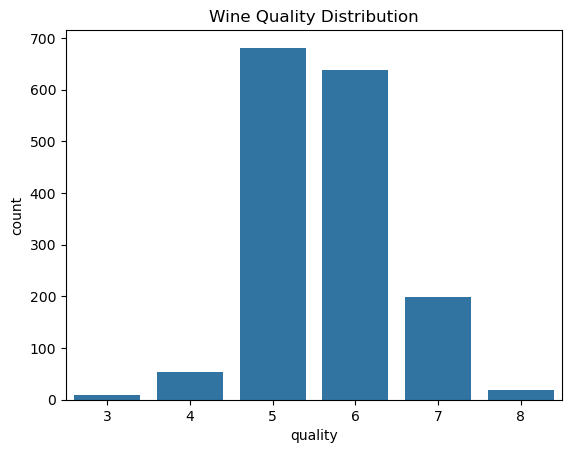

In [21]:
# Check quality distribution
df['quality'].value_counts()

sns.countplot(x=df['quality'])
plt.title("Wine Quality Distribution")
plt.show()


### TASK 5 — Convert to Classification Problem

#### Binary classification is more useful because:

* In real life, companies only care if wine is good or bad.

* It makes the model simpler and easier to evaluate.

* Predicting the exact quality (like 5, 6, 7) is harder and not always needed.

In [22]:
# Create quality_label column
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)


### TASK 6 — Feature & Target Separation

#### We cannot use the original quality column as input because:

* It directly gives away the answer.

* Using it will make the model cheat.

* Our job is to predict quality, not use it for prediction.

In [23]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']


### TASK 7 — Train-Test Split

#### We split data because:

* Training data is used for learning.

* Testing data is used for checking model performance.

#### If we train and test on the same data:

* The model will memorize answers.

* Accuracy will look high but will fail on new real-world data.

In [24]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### TASK 8 — Feature Scaling

#### Feature scaling is important because:

* Different features may have different units (e.g., acidity vs sugar).

* Models like KNN, SVM, Logistic Regression rely on distances or gradients.

* If we don’t scale, large-value features dominate learning.


Tree-based models like Random Forest do not need scaling.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### TASK 9 — Model Training

#### Explanation of Models

* Logistic Regression → Uses a mathematical curve to classify good vs bad wine.

* KNN → Compares a wine sample with its nearest neighbors.

* Decision Tree → Makes decisions based on conditions (like a flowchart).

* Random Forest → Uses many trees and takes majority vote.

* SVM → Draws the best boundary line that separates good and bad wines.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


### TASK 10 — Model Evaluation

* Model evalution is done using accurary to measure how many predictions are correct.

* The best model usually is Random Forest or SVM.

* They perform well because they handle complex feature relationships.

* Random Forest avoids overfitting and works well with mixed features.

In [27]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results


{'Logistic Regression': 0.865625,
 'KNN': 0.88125,
 'Decision Tree': 0.86875,
 'Random Forest': 0.90625,
 'SVM': 0.875}

### TASK 11 — Pipeline + GridSearchCV

#### Pipelines are important because:

* They combine scaling + model in one process.

* They prevent data leakage.

* They make the code clean and production-ready.

#### Hyperparameter tuning improves performance because:

* It finds the best settings for the model.

* Avoids guessing values manually.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_


({'svm__C': 10, 'svm__kernel': 'rbf'}, np.float64(0.8944424019607844))

### TASK 12 — Final Conclusion

1. The dataset contains various chemical features of wine samples, and each row represents one wine.

2. From EDA, we observed that the classes were imbalanced — most wines were of average quality.

3. To make the problem easier and more practical, we converted the quality column into a binary classification of Good or Bad wine.

#### Random Forest and SVM models gave the best performance because they handle complex patterns well.

### Through this project, get better understanding about  complete ML workflow — 
* data preprocessing
* feature creation
* scaling, model training 
* model comparison
* hyperparameter tuning
